In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [4]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

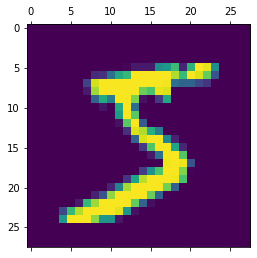

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [11]:
y_train[:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [13]:
x_train = x_train/255
x_test  = x_test/255

In [14]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
x_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid")
])

model.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

#model.fit(x_train,y_train,epochs=10)

In [18]:
es = EarlyStopping(monitor = "val_acc", min_delta = 0.01 , patience = 4 ,verbose = 1)

In [19]:
from keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint("models/model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
#mc = ModelCheckpoint("./bestmodel.h5",monitor = "val_acc",verbose = 1,save_best_only = True)

In [20]:
cb = [es,mc]

In [21]:
his = model.fit(x_train,y_train,epochs=10,validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 7s 4ms/step - loss: 1.4745 - accuracy: 0.6227 - val_loss: 0.8279 - val_accuracy: 0.8123
Epoch 2/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.6566 - accuracy: 0.8410 - val_loss: 0.5215 - val_accuracy: 0.8673
Epoch 3/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4774 - accuracy: 0.8761 - val_loss: 0.4206 - val_accuracy: 0.8880
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4063 - accuracy: 0.8904 - val_loss: 0.3739 - val_accuracy: 0.8965
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3684 - accuracy: 0.8981 - val_loss: 0.3462 - val_accuracy: 0.9033
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3441 - accuracy: 0.9028 - val_loss: 0.3291 - val_accuracy: 0.9054
Epoch 7/10
1313/1313 [==============================] - 5s 3ms/step - loss: 0.3269 - accuracy: 0.9074 - val_loss: 0.3179 - val_accuracy:

In [22]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [23]:
from tensorflow.keras.models import load_model

In [24]:
from keras.models import model_from_json

In [25]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json,{"tf":tf})
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
